In [1]:
import sys 
import os 
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 
sys.path.insert(0, project_root)

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from rdkit import Chem

In [3]:
TOP = Path.cwd().as_posix().replace('notebooks','')

In [4]:
raw_dir = Path(TOP) / 'data' /'raw'

In [5]:
test = 'N(=NC1=CC=CC=C1)C2=CC=CC=C2'
mol = Chem.MolFromSmiles(test)

In [6]:
test2 = 'O=C(NC1=CC=C(C2=CC(=C(N=NC3=CC=C(N=NC4=CC=C(C=C4)S(=O)(=O)O)C5=CC=C(C=C35)S(=O)(=O)O)C(O)=C12)S(=O)(=O)O)S(=O)(=O)O)C'
mol2 = Chem.MolFromSmiles(test2)

In [7]:
from ttc_nccrp.chm.chm import MoleculeProcessor

In [8]:
lri = pd.read_csv(raw_dir/'LRI_TTC_updated_180719.csv')

In [9]:
lri.columns

Index(['casrn', 'DTXSID', 'name', 'smiles', 'daily_intake', 'iris_noael',
       'tox_cast_oed_5th', 'tox_cast_oed_median', 'tox_tree_ttc', 'ttc_class',
       'kroes_decision', 'small_httk', 'large_cerapp', 'mark_ttc_class',
       'reason_for_NA', 'old_ttc_class'],
      dtype='object')

In [10]:
lri = (lri
 .rename(columns = {'DTXSID':'dtxsid'})
)

In [11]:
exclusions = lri[lri.mark_ttc_class == 'NA for TTC']

In [12]:
exclusions.head()

,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class
8,3520-42-1,DTXSID7021235,C.I. Acid Red 52,[Na+].CCN(CC)c1cc2[o+]c3cc(N(CC)CC)c(C)cc3c(-c...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
10,16423-68-0,DTXSID7021233,FD&C Red 3,[Na+].[Na+].[O-]C(=O)c1ccccc1-c1c2cc(I)c([O-])...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
13,4474-24-2,DTXSID2041705,C.I. Acid Blue 80,[Na+].[Na+].Cc1cc(C)c(c(C)c1Nc1ccc(Nc2c(C)cc(C...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
22,518-47-8,DTXSID9025328,Fluorescein sodium,[Na+].[Na+].[O-]c1ccc2c(Oc3cc([O-])ccc3C22OC(=...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
25,3567-66-6,DTXSID1044562,D&C Red No. 33,[Na+].[Na+].Nc1cc(cc2cc(c(N=Nc3ccccc3)c(O)c12)...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC


In [13]:
exclusions

,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class
8,3520-42-1,DTXSID7021235,C.I. Acid Red 52,[Na+].CCN(CC)c1cc2[o+]c3cc(N(CC)CC)c(C)cc3c(-c...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
10,16423-68-0,DTXSID7021233,FD&C Red 3,[Na+].[Na+].[O-]C(=O)c1ccccc1-c1c2cc(I)c([O-])...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
13,4474-24-2,DTXSID2041705,C.I. Acid Blue 80,[Na+].[Na+].Cc1cc(C)c(c(C)c1Nc1ccc(Nc2c(C)cc(C...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
22,518-47-8,DTXSID9025328,Fluorescein sodium,[Na+].[Na+].[O-]c1ccc2c(Oc3cc([O-])ccc3C22OC(=...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
25,3567-66-6,DTXSID1044562,D&C Red No. 33,[Na+].[Na+].Nc1cc(cc2cc(c(N=Nc3ccccc3)c(O)c12)...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40921,62-74-8,DTXSID8024311,Sodium fluoroacetate,[Na+].[O-]C(=O)CF,99,0.05,NaN,NaN,0.001500,Cramer Class III,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
41449,NOCAS_860215,DTXSID30860215,CERAPP_20203,OCC(OP(O)=O)OP(O)=O,99,NaN,NaN,NaN,0.030000,Cramer Class I,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,OP/Carbamate
42102,506-64-9,DTXSID9024306,Silver cyanide,[Ag+].[C-]#N,99,55.70,NaN,NaN,0.001500,Cramer Class III,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
43414,1111-67-7,DTXSID0034481,Copper thiocyanate,[Cu+].[S-]C#N,99,NaN,NaN,NaN,0.001500,Cramer Class III,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC


In [14]:
molprocess = MoleculeProcessor()

In [18]:
mytest = molprocess.add_chemical('DTXSID2057990', '[NH4+].[NH4+].[NH4+].CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP([O-])(=O)OP([O-])(=O)OC[C@H]1O[C@H](C(O)[C@H]1OP(O)([O-])=O)n1cnc2c(N)ncnc12')

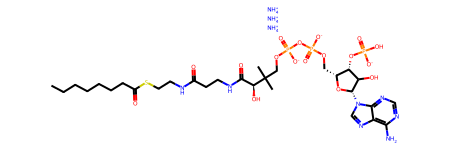

In [19]:
mytest['DTXSID2057990']

In [24]:
molprocess.genetox_alerts()

'Genetox'

In [27]:
import openpyxl


In [39]:
lri_all = pd.read_excel(raw_dir/'Copy of LRI_201021.xlsx')

In [40]:
lri_all = (lri_all
 .rename(columns = {'DTXSID':'dtxsid','final_TTC_category': 'final_TTC_category_orig'})
)

In [42]:
lri_all.head()

,Unnamed: 0,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,...,reason_for_NA,old_ttc_class,metal_salts,inorgs,inorgP,inorg_filter,COC,COC_Alerts,Genetox_Alert,final_TTC_category_orig
0,0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000291,0.002280,0.000003,...,NaN,Genotoxicity Alert,False,False,False,TTC_NA,['strained_heteronuclear_rings'],1.0,1.0,COC
1,1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000553,0.009572,0.000003,...,NaN,Genotoxicity Alert,False,False,False,TTC_NA,['strained_heteronuclear_rings'],1.0,1.0,COC
2,2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,NaN,0.050130,0.445990,0.001500,...,NaN,Class III,False,False,False,TTC_NA,[],0.0,1.0,Genotoxicity Alert
3,3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,NaN,0.239110,2.872300,0.001500,...,NaN,Class III,False,False,False,TTC_NA,[],0.0,1.0,Genotoxicity Alert
4,4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,NaN,1.564200,15.084000,0.000003,...,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[],0.0,1.0,Genotoxicity Alert


In [43]:
molprocess2 =  MoleculeProcessor()


In [44]:
result_df = molprocess2.process_batch(lri_all)

[17:05:40] WARNING: not removing hydrogen atom without neighbors
[17:05:40] WARNING: not removing hydrogen atom without neighbors
[17:05:51] WARNING: not removing hydrogen atom without neighbors
[17:05:51] WARNING: not removing hydrogen atom without neighbors
[17:05:55] WARNING: not removing hydrogen atom without neighbors
[17:05:55] WARNING: not removing hydrogen atom without neighbors
[17:05:55] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not removing hydrogen atom without neighbors
[17:05:56] WARNING: not r

In [45]:
result_df.to_csv(raw_dir/'results2.csv')

In [46]:
result_df.head()

,Unnamed: 0,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,...,old_ttc_class,metal_salts,inorgs,inorgP,inorg_filter,COC,COC_Alerts,Genetox_Alert,final_TTC_category_orig,final_TTC_category
0,0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000291,0.002280,0.000003,...,Genotoxicity Alert,False,False,False,TTC_NA,['strained_heteronuclear_rings'],1.0,1.0,COC,GeneTox - TTC of 0.15 ug/day
1,1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000553,0.009572,0.000003,...,Genotoxicity Alert,False,False,False,TTC_NA,['strained_heteronuclear_rings'],1.0,1.0,COC,GeneTox - TTC of 0.15 ug/day
2,2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,NaN,0.050130,0.445990,0.001500,...,Class III,False,False,False,TTC_NA,[],0.0,1.0,Genotoxicity Alert,GeneTox - TTC of 0.15 ug/day
3,3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,NaN,0.239110,2.872300,0.001500,...,Class III,False,False,False,TTC_NA,[],0.0,1.0,Genotoxicity Alert,GeneTox - TTC of 0.15 ug/day
4,4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,NaN,1.564200,15.084000,0.000003,...,Genotoxicity Alert,False,False,False,TTC_NA,[],0.0,1.0,Genotoxicity Alert,GeneTox - TTC of 0.15 ug/day
